In [43]:
import cv2
from pylab import *
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


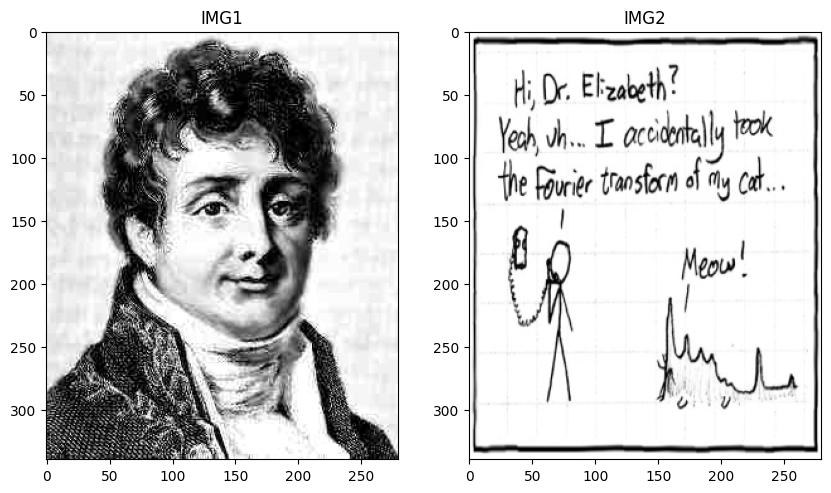

In [47]:
I1=cv2.imread('fourier.pgm',0)
I2= cv2.imread('fourier_transform.pgm',0)
I1=I1.astype(float)
I2=I2.astype(float)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.imshow(I1,'gray')
ax1.set_title('IMG1')

ax2.imshow(I2,'gray')
ax2.set_title('IMG2')

plt.show()


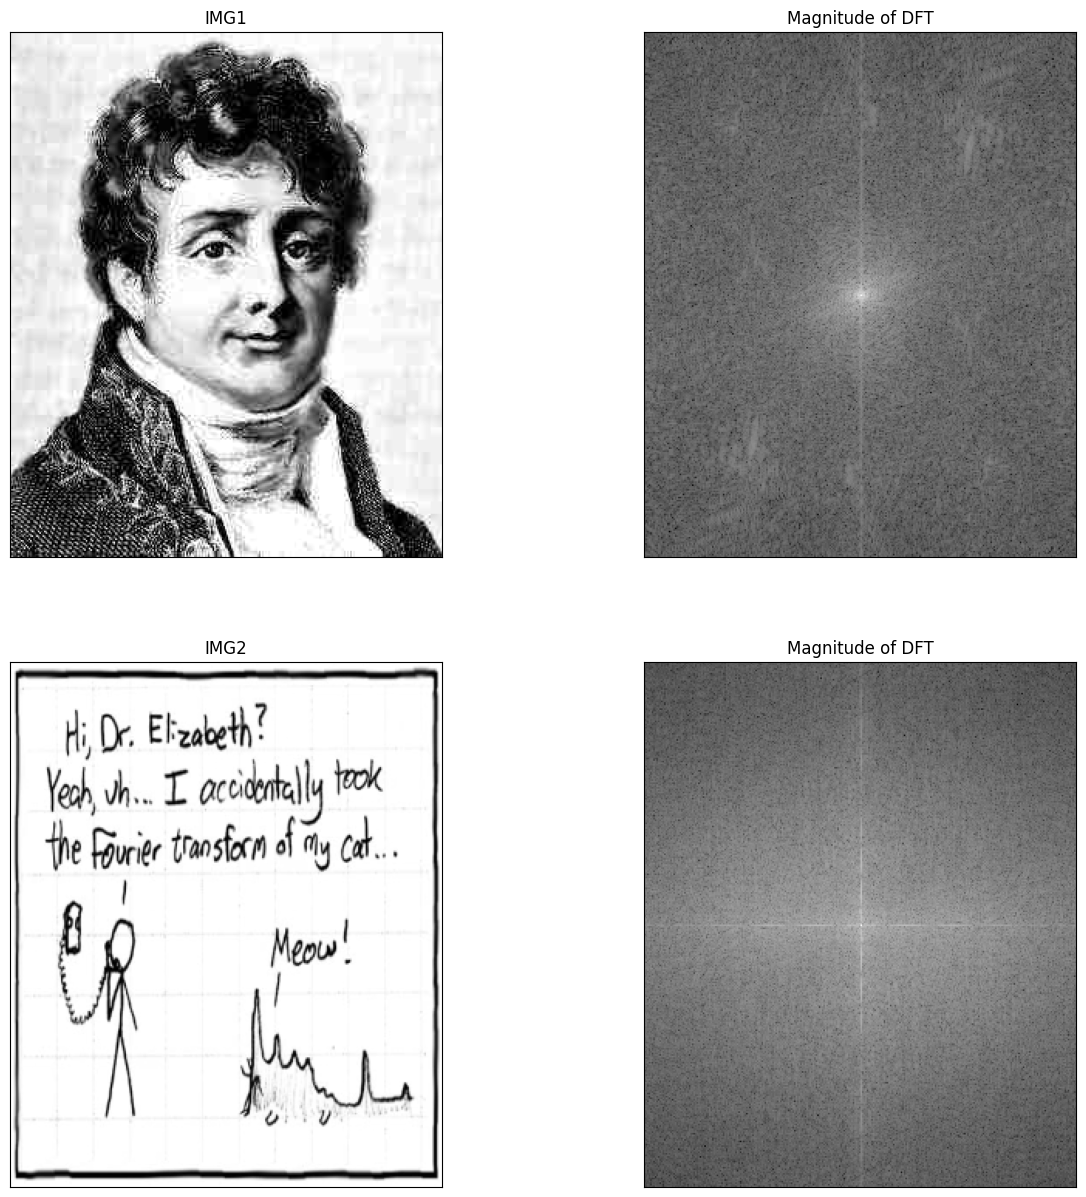

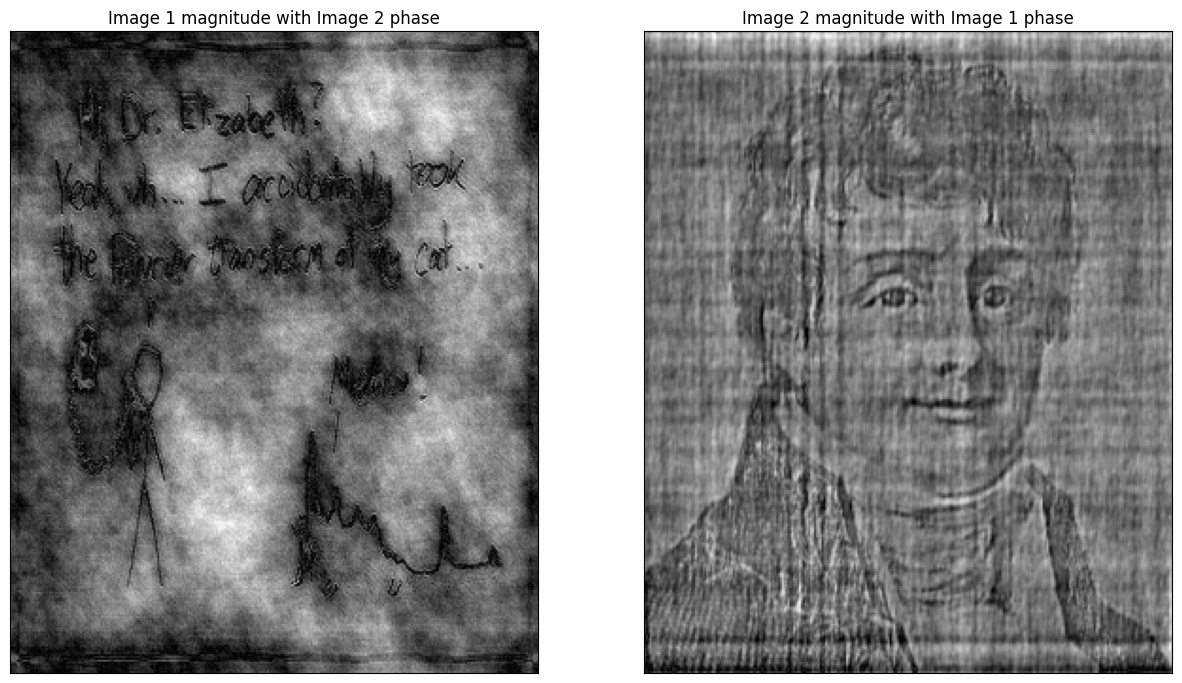

In [48]:
def dft2(img,is_centered=False):

    dft = np.fft.fft(img,axis=1)
    dft = np.fft.fft(dft,axis=0)

    if is_centered:
        dft = np.fft.fftshift(dft)

    return dft
fourier_dft1 = dft2(I1, True)
fourier_dft2 = dft2(I2, True)


fourier_mag_resp1 = 20 * np.log10(np.abs(fourier_dft1))
fourier_mag_resp2 = 20 * np.log10(np.abs(fourier_dft2))



f, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

ax1.imshow(I1,'gray')
ax1.set_title('IMG1')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(fourier_mag_resp1,'gray')
ax2.set_title('Magnitude of DFT')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)


ax3.imshow(I2,'gray')
ax3.set_title('IMG2')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)


ax4.imshow(fourier_mag_resp2, 'gray')
ax4.set_title('Magnitude of DFT')
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

plt.show()
I1_dft = dft2(I1, True)
I2_dft = dft2(I2, True)


mag1 = np.abs(I1_dft)
mag2 = np.abs(I2_dft)

phase1 = np.zeros_like(I1_dft)
phase2 = np.zeros_like(I2_dft)
phase1[mag1!=0] = I1_dft[mag1!=0]/mag1[mag1!=0]
phase2[mag2!=0] = I2_dft[mag2!=0]/mag2[mag2!=0]


I3_dft =  mag1 * phase2
I4_dft =  mag2 * phase1

I3  =  np.fft.ifft2(I3_dft,s=None, axes=(- 2, - 1), norm=None)
I4  =  np.fft.ifft2(I4_dft,s=None, axes=(- 2, - 1), norm=None)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 15))
ax1.imshow(np.abs(I3), 'gray')
ax1.set_title('Image 1 magnitude with Image 2 phase')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(np.abs(I4),'gray')
ax2.set_title('Image 2 magnitude with Image 1 phase')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.show()